In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from matplotlib import rcParams

# Set a font that supports the required characters
rcParams['font.family'] = 'DejaVu Sans'

# Зчитування даних з файлу
data = pd.read_csv('spotify_EDA_data_New_Columns.csv', encoding="latin1", delimiter=",")

# Видалення зайвої ознаки
data = data.drop(columns="Unnamed: 0")
data.head()

,track_name,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode,artist_count,released_year,released_month,...,instrumentalness_%,liveness_%,speechiness_%,in_apple_charts_log,power_transform_in_apple_charts,in_apple_charts_yeojohnson,boxcox_transformed_in_apple_charts,is_popular,rating,in_top_list_count
0,Seven (feat. Latto) (Explicit Ver.),157,141381703,45,826,B,Major,-0.589859,0.316092,0.264067,...,-0.135219,-0.752269,-0.745355,18.766974,5571777816042859239,1.788515,0.189015,True,4,2
1,Sprinter,55,183706234,88,946,C#,Major,-0.589859,0.316092,-0.023922,...,-0.135219,-0.752269,0.991126,19.028849,1403066989355542944,1.547561,0.189015,True,4,9
2,Ella Baila Sola,84,725980112,43,418,F,Minor,-0.589859,0.316092,-0.887892,...,-0.135219,-0.752269,-0.832179,20.403033,5328038412871008256,1.594478,0.189015,True,4,2
3,La Bebe - Remix,208,553634067,66,339,D,Minor,-0.589859,0.316092,-0.887892,...,-0.135219,-0.752269,1.772542,20.132015,-3983484656994843325,0.823002,0.189014,True,3,7
4,un x100to,20,505671438,54,251,F#,Minor,-0.589859,0.316092,-0.599902,...,-0.135219,0.524485,-0.658531,20.041398,-3960668718200724256,1.504326,0.189015,True,2,7


In [2]:
# Розбиття ознак
X = data[['rating', 'in_top_list_count']]
Y = data['is_popular']

In [3]:
# Розбиття dataset на тренувальні та тестові дані за допомогою train_test_split, який ми імпортували
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Імпорт бібліотек для побудови Дерева Рішень
from sklearn.tree import DecisionTreeClassifier

# Використання моделі рішень (Decision Tree) з максимальною глибиною 2.
dtree = DecisionTreeClassifier(random_state=10)

# Модель навчається (fit) на тренувальних даних (X_train, y_train),
# після чого робить передбачення (predict) для тренувальних даних (train_predictions)
# та тестових даних (test_predictions).
dtree.fit(X_train, y_train)

print("Навчальна вибірка:")
print(dtree.score(X_train, y_train))

print("Тестова вибірка:")
print(dtree.score(X_test, y_test))

Навчальна вибірка:
0.680365296803653
Тестова вибірка:
0.5425531914893617


In [4]:
another_dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)

print("Навчальна вибірка:")
print(dtree.score(X_train, y_train))

print("Тестова вибірка:")
print(dtree.score(X_test, y_test))

Навчальна вибірка:
0.680365296803653
Тестова вибірка:
0.5425531914893617


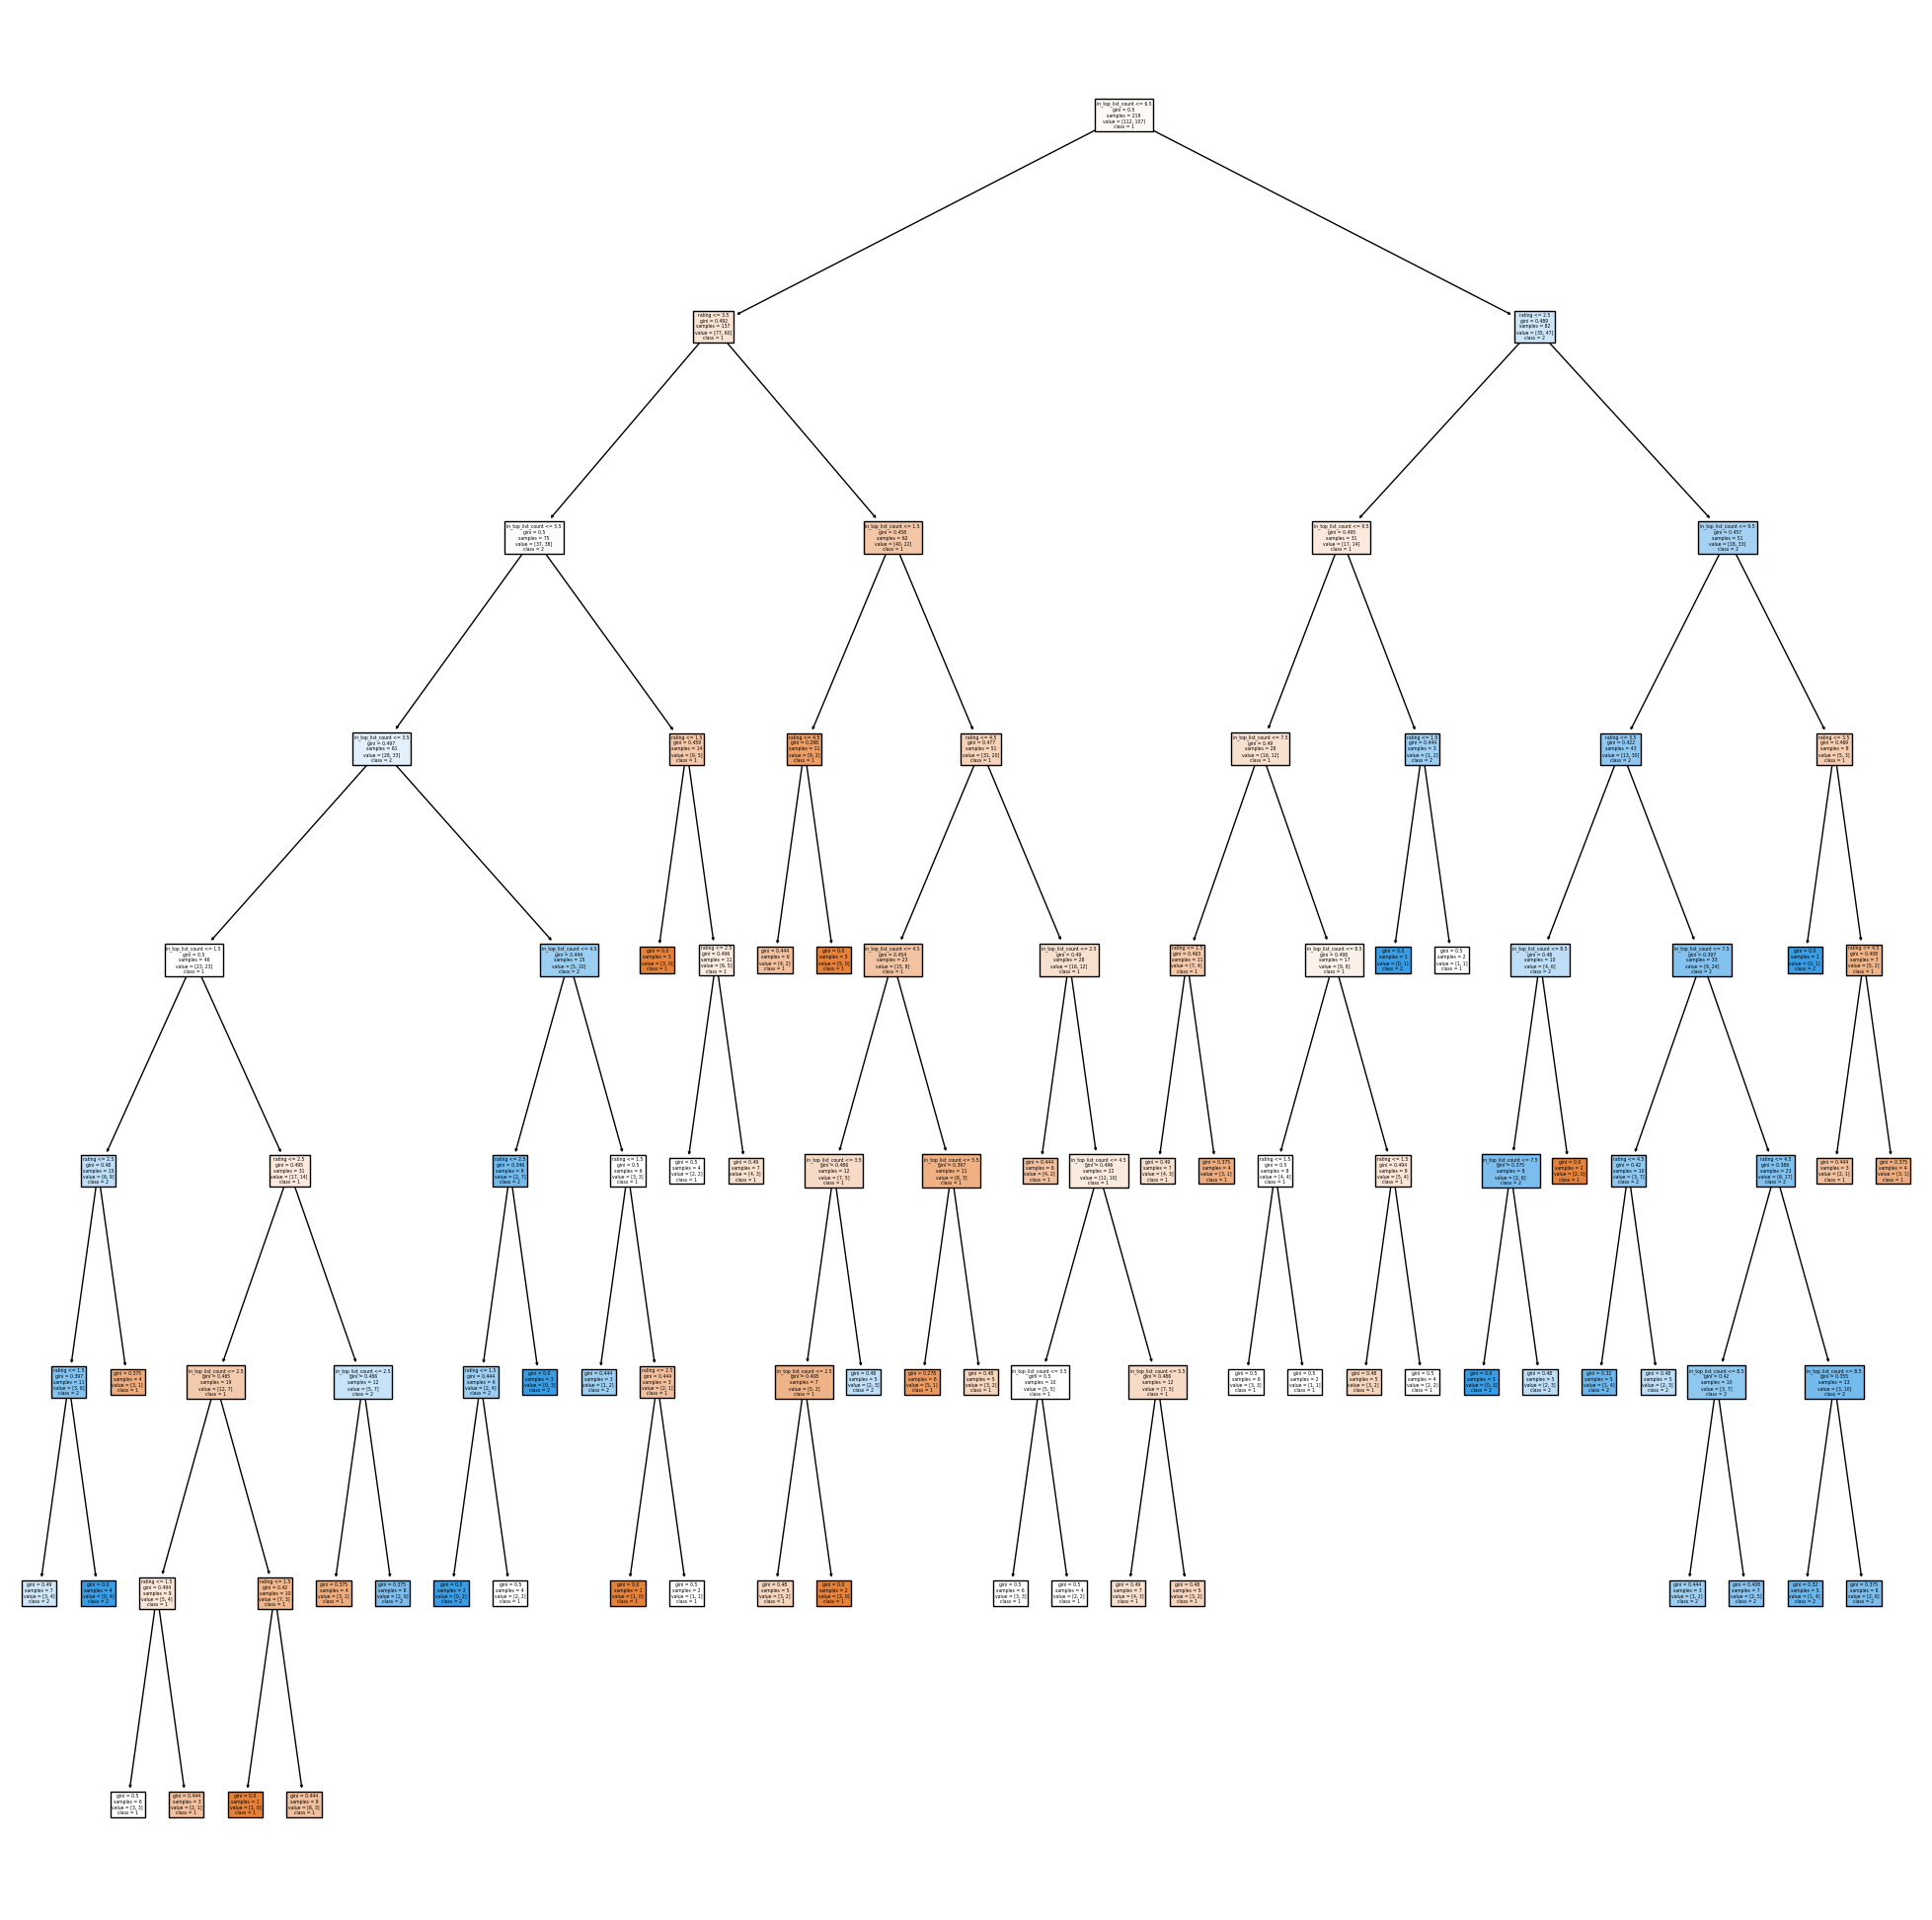

In [5]:
# Імпорт для побудови (графічно) Дерева Рішень
from sklearn.tree import plot_tree

# Крок 4: Візуалізація дерева рішень
plt.figure(figsize=(25, 25))
plot_tree(dtree, filled=True, feature_names = X.columns.tolist(), class_names=[str(i) for i in range(1, 4)])
plt.show()

In [6]:
# 6. Підбір оптимальних параметрів моделі
best_train_acc = 0
best_test_acc = 0
best_max_depth = 1

for depth in range(1, 11):
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree.fit(X_train, y_train)
    
    train_acc = dtree.score(X_train, y_train)
    test_acc = dtree.score(X_test, y_test)
    
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_train_acc = train_acc
        best_max_depth = depth


print("Best Train Accuracy:", best_train_acc)
print("Best Test Accuracy:", best_test_acc)
print("Best Max Depth:", best_max_depth)

Best Train Accuracy: 0.6210045662100456
Best Test Accuracy: 0.5531914893617021
Best Max Depth: 4


In [7]:
# 7. Обрізка та перебудова дерева з оптимальною глибиною
pruned_dtree = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=2)

# Перебудова дерева з оптимальною глибиною
pruned_dtree.fit(X_train, y_train)

# 8. Оцінка параметрів "оптимальної моделі"
print("Train Accuracy (pruned):", pruned_dtree.score(X_train, y_train))
print("Test Accuracy (pruned):", pruned_dtree.score(X_test, y_test))

Train Accuracy (pruned): 0.6210045662100456
Test Accuracy (pruned): 0.5531914893617021


In [9]:
# Важливість ознак для кінцевої моделі після обрізки та перебудови
feature_importance = pruned_dtree.feature_importances_

# Створення DataFrame для зручного відображення важливості ознак
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Виведення важливості ознак
print("Важливість ознак у кінцевій моделі:")
feature_importance_df


Важливість ознак у кінцевій моделі:


,Feature,Importance
0,rating,0.51305
1,in_top_list_count,0.48695
